In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load a sample dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

In [5]:
# Convert data to pandas DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

In [13]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [14]:
print(df.shape)

(20640, 9)


In [6]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [7]:
print("Linear Regression:")
print("Mean squared error:", mean_squared_error(y_test, lr_predictions))
print("Coefficient of determination (R^2):", r2_score(y_test, lr_predictions))
print()

Linear Regression:
Mean squared error: 0.5558915986952422
Coefficient of determination (R^2): 0.5757877060324524



In [8]:
# Fitting a Robust Regression Model using RANSAC
ransac_model = RANSACRegressor()
ransac_model.fit(X_train, y_train)
ransac_predictions = ransac_model.predict(X_test)

In [9]:
print("RANSAC Regression:")
print("Mean squared error:", mean_squared_error(y_test, ransac_predictions))
print("Coefficient of determination (R^2):", r2_score(y_test, ransac_predictions))
print()

RANSAC Regression:
Mean squared error: 0.7606904051012978
Coefficient of determination (R^2): 0.41950153140552127



In [10]:
# Computing the Correlation Matrix
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)
print()

Correlation Matrix:
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -

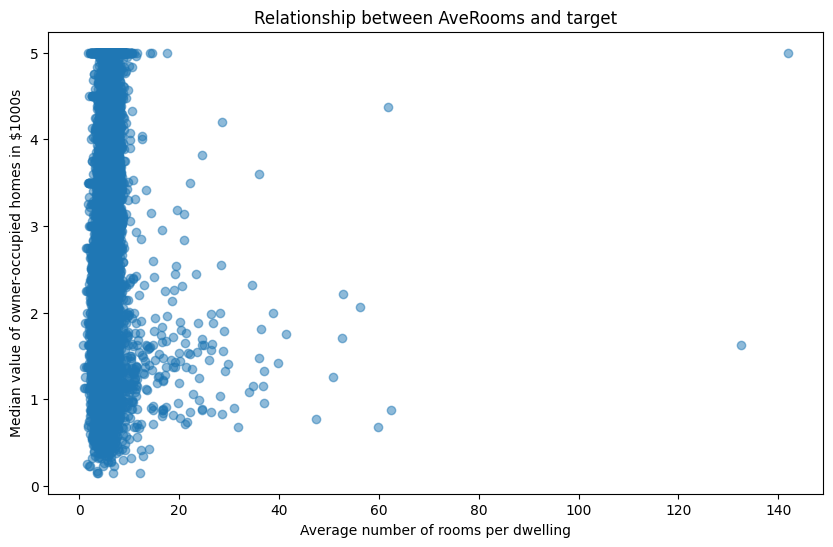

In [15]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['AveRooms'], df['target'], alpha=0.5)
plt.title('Relationship between AveRooms and target')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

In [16]:
# Regularized Methods for Regression (Lasso and Ridge)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

In [17]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

In [18]:
print("Lasso Regression:")
print("Mean squared error:", mean_squared_error(y_test, lasso_predictions))
print("Coefficient of determination (R^2):", r2_score(y_test, lasso_predictions))
print()

Lasso Regression:
Mean squared error: 0.6135115198058131
Coefficient of determination (R^2): 0.5318167610318159



In [19]:
print("Ridge Regression:")
print("Mean squared error:", mean_squared_error(y_test, ridge_predictions))
print("Coefficient of determination (R^2):", r2_score(y_test, ridge_predictions))
print()

Ridge Regression:
Mean squared error: 0.5558827543113783
Coefficient of determination (R^2): 0.5757944553633947



In [20]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [21]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [22]:
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train_poly)
poly_lr_predictions = poly_lr_model.predict(X_test_poly)

In [23]:
print("Polynomial Regression:")
print("Mean squared error:", mean_squared_error(y_test_poly, poly_lr_predictions))
print("Coefficient of determination (R^2):", r2_score(y_test_poly, poly_lr_predictions))
print()

Polynomial Regression:
Mean squared error: 0.46430152592457724
Coefficient of determination (R^2): 0.6456819713278688



In [24]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [25]:
print("Decision Tree Regression:")
print("Mean squared error:", mean_squared_error(y_test, dt_predictions))
print("Coefficient of determination (R^2):", r2_score(y_test, dt_predictions))
print()

Decision Tree Regression:
Mean squared error: 0.494833195900436
Coefficient of determination (R^2): 0.6223826270141228

